In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential

In [2]:
#  train = ImageDataGenerator(rescale=1./255)
#  test =  ImageDataGenerator(rescale=1./255)
#  val =  ImageDataGenerator(rescale=1./255)

In [3]:
train='dataset/train/'

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(128,128),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [5]:
val='dataset/train/'

In [6]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(128,128),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [7]:
test='dataset/test/'

In [8]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(128,128),
    batch_size=32,
    seed=1000
    )

Found 1311 files belonging to 4 classes.


In [9]:
class_names = ['Glioma', 'Meningioma', 'Notumor', 'Pituitary']

In [10]:
train_data.class_names = class_names
val_data.class_names = class_names

In [11]:
print(val_data)

<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>


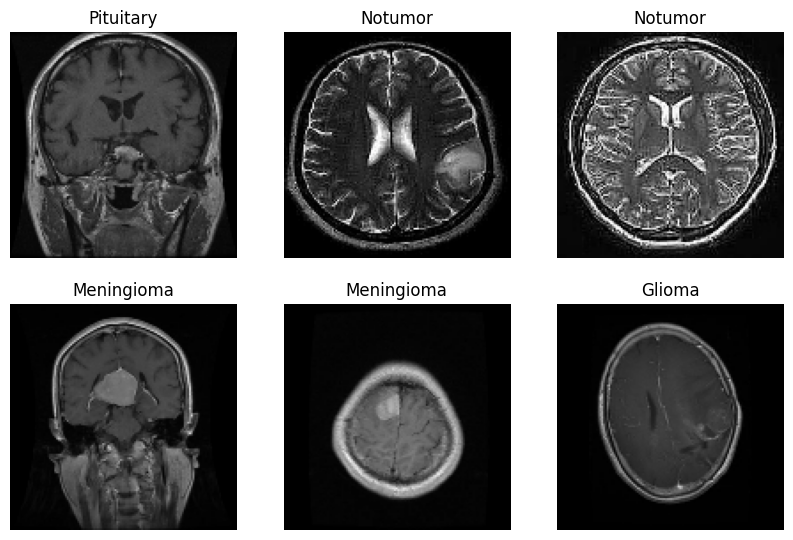

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense

In [14]:
# model=Sequential()

# model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(30,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(100,activation='relu'))
# model.add(Dense(133,activation='relu'))
# model.add(Dense(4,activation='softmax'))

In [15]:
input_shape=(128, 128, 3)
# regularizer = tf.keras.regularizers.l2(0.001)

model=Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu'))
model.add(MaxPool2D((9, 9), strides=(3, 3)))

model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu'))
model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu'))
model.add(MaxPool2D((5, 5), strides=(2, 2)))

model.add(Conv2D(32 , (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu'))
model.add(MaxPool2D((3, 3), strides=(2, 2)))   
    
model.add(Flatten())
# model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', name='fc1'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax', name='fc3'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 128, 128, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 40, 40, 64)        204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv4 (Conv2D)               (None, 4, 4, 32)          9

In [17]:
# model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_data, validation_data=val_data, epochs=50)

Epoch 1/50
143/143 [==============================] - 18s 82ms/step - loss: 1.9698 - accuracy: 0.4871 - val_loss: 0.8935 - val_accuracy: 0.6103
Epoch 2/50
143/143 [==============================] - 10s 70ms/step - loss: 0.7283 - accuracy: 0.6908 - val_loss: 0.5678 - val_accuracy: 0.7583
Epoch 3/50
143/143 [==============================] - 10s 70ms/step - loss: 0.6414 - accuracy: 0.7350 - val_loss: 0.5464 - val_accuracy: 0.7793
Epoch 4/50
143/143 [==============================] - 10s 70ms/step - loss: 0.5607 - accuracy: 0.7744 - val_loss: 0.4541 - val_accuracy: 0.8109
Epoch 5/50
143/143 [==============================] - 10s 70ms/step - loss: 0.5039 - accuracy: 0.8013 - val_loss: 0.5302 - val_accuracy: 0.8012
Epoch 6/50
143/143 [==============================] - 10s 70ms/step - loss: 0.4481 - accuracy: 0.8315 - val_loss: 0.4490 - val_accuracy: 0.8109
Epoch 7/50
143/143 [==============================] - 10s 70ms/step - loss: 0.3751 - accuracy: 0.8602 - val_loss: 0.4061 - val_accuracy:

In [20]:
model.save("weight_new.h5")

In [21]:
model.evaluate(val_data)

36/36 [==============================] - 1s 23ms/step - loss: 0.2769 - accuracy: 0.9343


[0.27691617608070374, 0.9343257546424866]

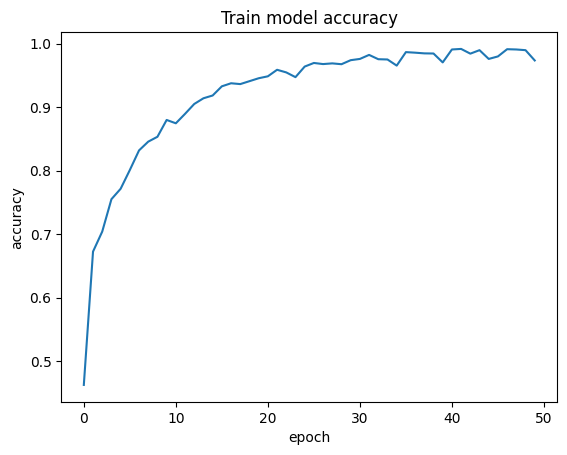

In [22]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

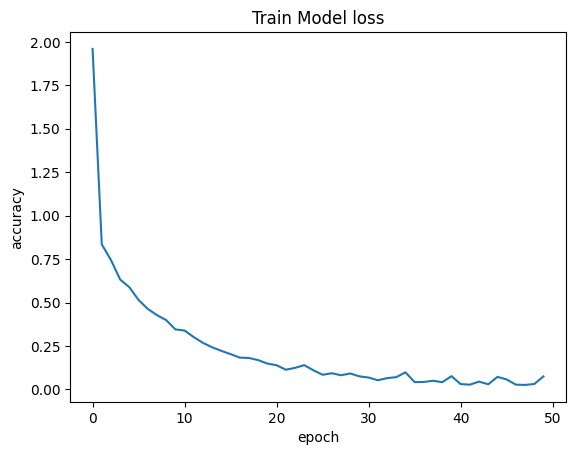

In [23]:
plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

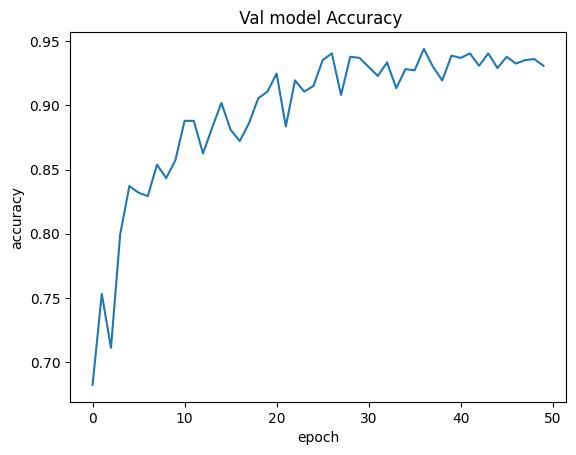

In [24]:
plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

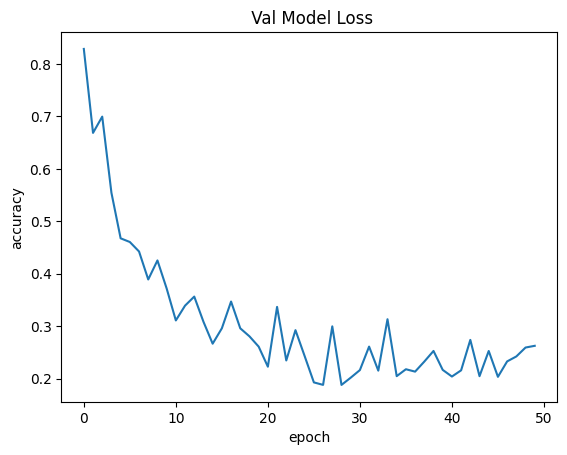

In [25]:
plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

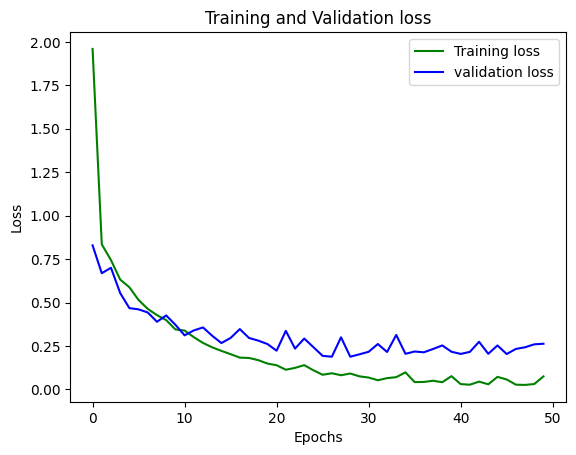

In [26]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

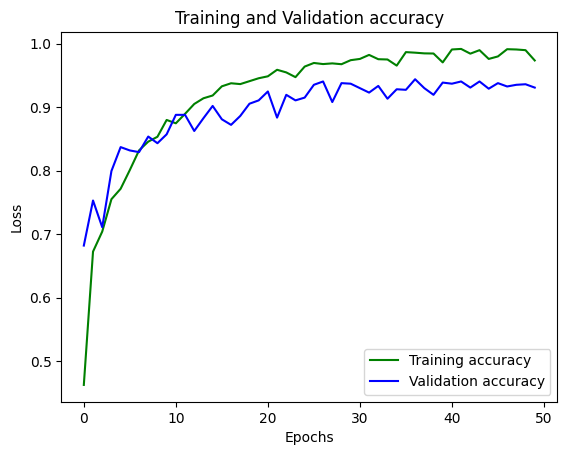

In [27]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
class_names={0:"Glioma", 1:"Meningioma", 2:"Notumor", 3:"Pituitary"}

In [30]:
for images, labels in val_data.take(1):
    for i in range(6):
        print("True_class:",val_data.class_names[labels[i]])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        if p==0:
            print("Predicted Image: Glioma")
        elif p==1:
            print("Predicted Image: Meningioma")
        elif p==2:
            print("Predicted Image: Notumor")
        else:
            print("Predicted Image: Pituitary")
        
        print("Predicted class:",p)

True_class: Glioma
Predicted Image: Glioma
Predicted class: 0
True_class: Pituitary
Predicted Image: Pituitary
Predicted class: 3
True_class: Glioma
Predicted Image: Glioma
Predicted class: 0
True_class: Meningioma
Predicted Image: Pituitary
Predicted class: 3
True_class: Meningioma
Predicted Image: Meningioma
Predicted class: 1
True_class: Glioma
Predicted Image: Glioma
Predicted class: 0
